In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# 한글 폰트 설치
!apt -qq update
!apt -qq install fonts-nanum fonts-nanum-coding
!fc-cache -fv

30 packages can be upgraded. Run 'apt list --upgradable' to see them.
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory dete

In [ ]:
# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/NanumBarunGothic.ttf'  # 폰트 경로 설정

plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['font.weight'] = 'regular'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 인천 전체 학령인구 시각화

In [ ]:
# 전체 학령인구 데이터 불러오기
df1 = pd.read_csv('/content/drive/MyDrive/FIELD/전체 학령인구.csv')
df1

,Unnamed: 0,2015,2016,2017,2018,2019,2020,2021,2022,2023,...,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
0,합계,506182,494525,483892,474220,464577,453350,445259,435453,426303,...,416136,415382,414680,412852,409359,407782,406867,403929,401318,399333
1,중구,18560,18586,18621,19063,18789,18731,18758,18873,18922,...,19433,19649,19811,19918,20237,20644,20998,21244,21416,21298
2,동구,10692,10182,9702,9258,8787,8350,7997,7628,7332,...,6799,6731,6665,6568,6479,6455,6426,6361,6330,6376


In [ ]:
# 초등 학령인구 데이터 불러오기
df2 = pd.read_csv('/content/drive/MyDrive/FIELD/초등 학령인구.csv')
df2

,Unnamed: 0,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1,2023.1,...,2026.1,2027.1,2028.1,2029.1,2030.1,2031.1,2032.1,2033.1,2034.1,2035.1
0,합계,158380,157444,160133,162712,163222,160325,160079,158928,155013,...,147977,146362,146164,146726,147151,147749,148514,149320,150020,150485
1,중구,6731,6694,6692,7104,7143,7214,7436,7572,7557,...,7484,7484,7521,7606,7809,8014,8215,8409,8590,8564
2,동구,3591,3424,3374,3295,3146,2950,2861,2768,2606,...,2386,2340,2318,2323,2330,2346,2363,2381,2398,2446


In [ ]:
# 그래프 사용 데이터 정리
year = df1.columns.tolist()
year.pop(0)

df1_total = df1.iloc[0,1:].tolist()
df2_total = df2.iloc[0,1:].tolist()

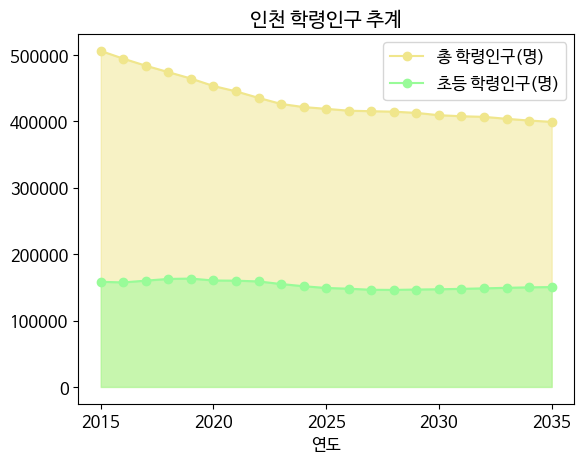

In [ ]:
fig = plt.figure()

plt.plot(year, df1_total, color='khaki', marker='o', linestyle='solid', label='총 학령인구(명)')
plt.plot(year, df2_total, color='palegreen', marker='o', linestyle='solid', label='초등 학령인구(명)')
plt.fill_between(year, df1_total, color = 'khaki', alpha=0.5)
plt.fill_between(year, df2_total, color='palegreen', alpha=0.5)

plt.xticks(year[::5])
plt.title("인천 학령인구 추계")
plt.xlabel("연도")

plt.legend()
plt.show()

## 인천 행정구역별 학령인구 시각화

In [ ]:
# 인천 학령인구 추계 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/FIELD/인천_학령인구_추계.csv', encoding = 'euc-kr')

In [ ]:
df.head()

,행정구역(자치구)별(1),2015,2015.1,2015.2,2015.3,2015.4,2016,2016.1,2016.2,2016.3,...,2034,2034.1,2034.2,2034.3,2034.4,2035,2035.1,2035.2,2035.3,2035.4
0,행정구역(자치구)별(1),전체,초등학교(6-11세),중학교(12-14세),고등학교(15-17세),대학교(18-21세),전체,초등학교(6-11세),중학교(12-14세),고등학교(15-17세),...,전체,초등학교(6-11세),중학교(12-14세),고등학교(15-17세),대학교(18-21세),전체,초등학교(6-11세),중학교(12-14세),고등학교(15-17세),대학교(18-21세)
1,합계,506182,158380,89377,105659,152766,494525,157444,83299,102707,...,401318,150020,73363,73174,104761,399333,150485,73636,73396,101816
2,중구,18560,6731,3389,4229,4211,18586,6694,3323,3940,...,21416,8590,4150,3817,4859,21298,8564,4156,3836,4742
3,동구,10692,3591,1826,2202,3073,10182,3424,1746,2051,...,6330,2398,1116,1140,1676,6376,2446,1136,1158,1636
4,남구,63899,18441,10499,12877,22082,61387,18086,9666,12407,...,44648,15865,7777,8161,12845,44565,15996,7824,8189,12556


In [ ]:
# 행정구역별 초등 학령인구

df = df.iloc[2:,1:]
df_total = df.iloc[:, 1:106:5]  # 전체 데이터

df_5y = df_total.iloc[:,0::5]  # 5년 단위 데이터로 간소화

In [ ]:
df_total.head()

,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1,2023.1,2024.1,...,2026.1,2027.1,2028.1,2029.1,2030.1,2031.1,2032.1,2033.1,2034.1,2035.1
2,6731,6694,6692,7104,7143,7214,7436,7572,7557,7429,...,7484,7484,7521,7606,7809,8014,8215,8409,8590,8564
3,3591,3424,3374,3295,3146,2950,2861,2768,2606,2502,...,2386,2340,2318,2323,2330,2346,2363,2381,2398,2446
4,18441,18086,18560,19296,18958,18634,18610,18454,17961,17469,...,16729,16369,16189,16129,16037,15959,15917,15890,15865,15996
5,19643,20599,22326,23446,25521,25379,25738,25956,25584,25088,...,24472,24228,24152,24244,24431,24634,24862,25106,25330,25229
6,29740,30111,31189,31850,31623,30792,30490,30083,29231,28628,...,27311,26687,26359,26202,26138,26144,26198,26282,26373,26631


In [ ]:
df_5y.head()

,2015.1,2020.1,2025.1,2030.1,2035.1
2,6731,7214,7454,7809,8564
3,3591,2950,2426,2330,2446
4,18441,18634,17040,16037,15996
5,19643,25379,24672,24431,25229
6,29740,30792,27744,26138,26631


In [ ]:
df_5y.to_dict(orient='list')

{'2015.1': ['6731',
  '3591',
  '18441',
  '19643',
  '29740',
  '27469',
  '17213',
  '32514',
  '2355',
  '683'],
 '2020.1': ['7214',
  '2950',
  '18634',
  '25379',
  '30792',
  '23701',
  '14247',
  '34557',
  '2256',
  '595'],
 '2025.1': ['7454',
  '2426',
  '17040',
  '24672',
  '27744',
  '20239',
  '11607',
  '35357',
  '1992',
  '549'],
 '2030.1': ['7809',
  '2330',
  '16037',
  '24431',
  '26138',
  '19442',
  '11084',
  '37306',
  '2013',
  '561'],
 '2035.1': ['8564',
  '2446',
  '15996',
  '25229',
  '26631',
  '20236',
  '11491',
  '37052',
  '2221',
  '619']}

In [ ]:
data = {
    '행정구역':['중구','중구','중구','중구','중구',
                '동구','동구','동구','동구','동구',
                '남구','남구','남구','남구','남구',
                '연수구','연수구','연수구','연수구','연수구',
                '남동구','남동구','남동구','남동구','남동구',
                '부평구','부평구','부평구','부평구','부평구',
                '계양구','계양구','계양구','계양구','계양구',
                '서구','서구','서구','서구','서구',
                '강화군','강화군','강화군','강화군','강화군',
                '옹진군','옹진군','옹진군','옹진군','옹진군',],
    '연도':[2015,2020,2025,2030,2035,2015,2020,2025,2030,2035,
            2015,2020,2025,2030,2035,2015,2020,2025,2030,2035,
            2015,2020,2025,2030,2035,2015,2020,2025,2030,2035,
            2015,2020,2025,2030,2035,2015,2020,2025,2030,2035,
            2015,2020,2025,2030,2035,2015,2020,2025,2030,2035],
    '초등 학령인구':[6731, 7214, 7454, 7809, 8564,
                    3591, 2950, 2426, 2330, 2446,
                    18441, 18634, 17040, 16037, 15996,
                    19643, 25379, 24672, 24431, 25229,
                    29740, 30792, 27744, 26138, 26631,
                    27469, 23701, 20239, 19442, 20236,
                    17213, 14247, 11607, 11084, 11491,
                    32514, 34557, 35357, 37306, 37052,
                    2355, 2256, 1992, 2013, 2221,
                    683, 595, 549, 561, 619]
}

df_area = pd.DataFrame(data)

In [ ]:
df_area

,행정구역,연도,초등 학령인구
0,중구,2015,6731
1,중구,2020,7214
2,중구,2025,7454
3,중구,2030,7809
4,중구,2035,8564
5,동구,2015,3591
6,동구,2020,2950
7,동구,2025,2426
8,동구,2030,2330
9,동구,2035,2446


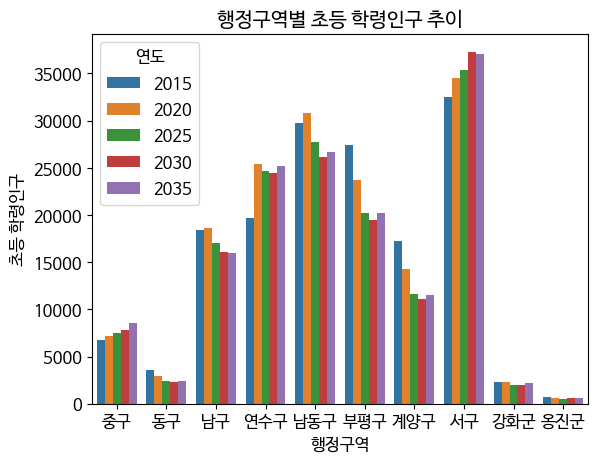

In [ ]:
plt.title("행정구역별 초등 학령인구 추이")
plt.xlabel("행정구역명")
plt.ylabel("명")

sns.barplot(data=df_area, x='행정구역', y='초등 학령인구', hue='연도')

plt.show();

In [ ]:
int_year = [int(y) for y in year]

In [ ]:
area_1 = [int(i) for i in df_total.iloc[0,:].tolist()]
area_2 = [int(i) for i in df_total.iloc[1,:].tolist()]
area_3 = [int(i) for i in df_total.iloc[2,:].tolist()]
area_4 = [int(i) for i in df_total.iloc[3,:].tolist()]
area_5 = [int(i) for i in df_total.iloc[4,:].tolist()]
area_6 = [int(i) for i in df_total.iloc[5,:].tolist()]
area_7 = [int(i) for i in df_total.iloc[6,:].tolist()]
area_8 = [int(i) for i in df_total.iloc[7,:].tolist()]
area_9 = [int(i) for i in df_total.iloc[8,:].tolist()]
area_10 = [int(i) for i in df_total.iloc[9,:].tolist()]

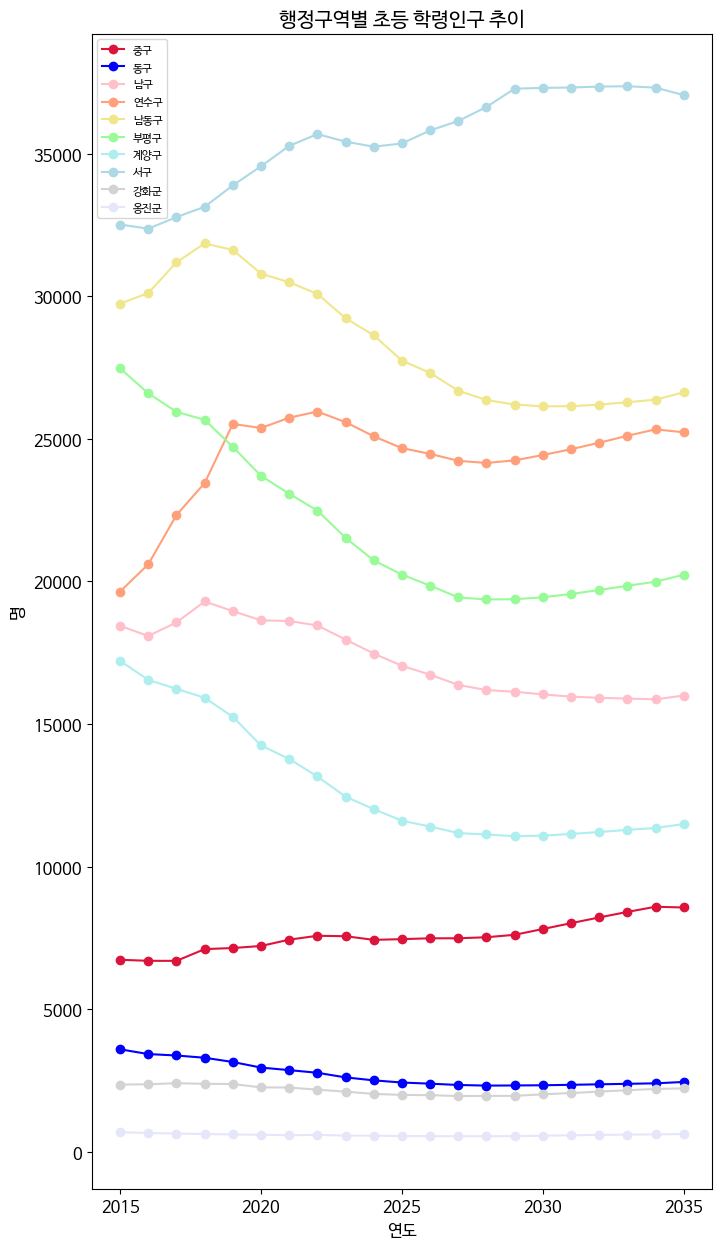

In [ ]:
plt.figure(figsize=(8,15))

plt.title("행정구역별 초등 학령인구 추이")
plt.xlabel("연도")
plt.ylabel("명")

plt.plot(year, area_1, color='crimson', marker='o', linestyle='solid')
plt.plot(year, area_2, color='blue', marker='o', linestyle='solid')
plt.plot(year, area_3, color='pink', marker='o', linestyle='solid')
plt.plot(year, area_4, color='lightsalmon', marker='o', linestyle='solid')
plt.plot(year, area_5, color='khaki', marker='o', linestyle='solid')
plt.plot(year, area_6, color='palegreen', marker='o', linestyle='solid')
plt.plot(year, area_7, color='paleturquoise', marker='o', linestyle='solid')
plt.plot(year, area_8, color='lightblue', marker='o', linestyle='solid')
plt.plot(year, area_9, color='lightgrey', marker='o', linestyle='solid')
plt.plot(year, area_10, color='lavender', marker='o', linestyle='solid')

plt.xticks(year[::5])
font_props = {'size':8}
plt.legend(["중구","동구","남구","연수구","남동구","부평구","계양구","서구","강화군","옹진군"], prop = font_props, loc = 'upper left')

plt.show();